<a href="https://colab.research.google.com/github/mylesshin/shin-park-wildfire/blob/main/wildfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 46.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

#df = pd.read_csv("wildfiredb.csv")

#df_corr = df[["Neighbor Slope max.", "Neighbor Slope min.", "Neighbor Slope median", "Neighbor Slope sum", "Neighbor Slope mode", "Neighbor Slope count", "Neighbor Slope mean", "Weather"]]

#df_corr.corr()

In [ ]:
!wget https://big-data-final-project.s3.amazonaws.com/wildfiredb.csv


--2023-04-25 21:01:41--  https://big-data-final-project.s3.amazonaws.com/wildfiredb.csv
Resolving big-data-final-project.s3.amazonaws.com (big-data-final-project.s3.amazonaws.com)... 52.217.228.113, 52.217.67.28, 52.216.42.137, ...
Connecting to big-data-final-project.s3.amazonaws.com (big-data-final-project.s3.amazonaws.com)|52.217.228.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5688115791 (5.3G) [text/csv]
Saving to: ‘wildfiredb.csv.2’

wildfiredb.csv.2      0%[                    ]  46.64M   115MB/s               ^C


In [ ]:
import pandas as pd

# Define the file path
file_path = 'wildfiredb.csv'

# Read the first 10 rows of the CSV file using Pandas
df = pd.read_csv(file_path, nrows=20000)
df = df.dropna()

# Print the Pandas DataFrame
print(df)




       Polygon_ID    acq_date    frp  Neighbour  Neighbour_frp  CBC2014_max   
0            7234  2012-11-06    3.2       7233            0.0         13.0  \
1            7380  2012-11-06    5.1       7233            0.0        100.0   
2            7381  2014-11-02    0.9       7233            0.0        100.0   
3            7381  2012-11-06    3.2       7233            0.0        100.0   
4           15290  2015-11-14   14.6      15437            0.0        100.0   
...           ...         ...    ...        ...            ...          ...   
19995      660132  2017-07-18  108.1     660323            0.0        100.0   
19996      660513  2017-07-18  108.1     660323            0.0          8.0   
19997      660324  2017-07-18  108.1     660323            0.0        100.0   
19998      661239  2017-07-19   43.5     661048            0.0          8.0   
19999      660858  2017-07-19   42.5     661048            0.0        100.0   

       CBC2014_min  CBC2014_median  CBC2014_sum  CB

In [ ]:
from scipy import stats

# Define a function to remove outliers using the Z-score method
def remove_outliers(df, z_thresh):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < z_thresh).all(axis=1)
    return df[filtered_entries]

# Define the Z-score threshold for outlier removal
z_thresh = 3

# Apply the remove_outliers function to your DataFrame
df = remove_outliers(df, z_thresh)


TypeError: ignored

In [ ]:
# Define the file path
file_path = 'wildfiredb.csv'

# Read only the first row of the CSV file to extract the column names
with open(file_path, 'r') as f:
    column_names = pd.read_csv(f, nrows=1).columns

# Print all the column names in one line
print(', '.join(column_names))



Polygon_ID, acq_date, frp, Neighbour, Neighbour_frp, CBC2014_max, CBC2014_min, CBC2014_median, CBC2014_sum, CBC2014_mode, CBC2014_count, CBC2014_mean, CBD2012_max, CBD2012_min, CBD2012_median, CBD2012_sum, CBD2012_mode, CBD2012_count, CBD2012_mean, CBD2016_max, CBD2016_min, CBD2016_median, CBD2016_sum, CBD2016_mode, CBD2016_count, CBD2016_mean, CBH2012_max, CBH2012_min, CBH2012_median, CBH2012_sum, CBH2012_mode, CBH2012_count, CBH2012_mean, CBH2014_max, CBH2014_min, CBH2014_median, CBH2014_sum, CBH2014_mode, CBH2014_count, CBH2014_mean, CBH2016_max, CBH2016_min, CBH2016_median, CBH2016_sum, CBH2016_mode, CBH2016_count, CBH2016_mean, CC2012_max, CC2012_min, CC2012_median, CC2012_sum, CC2012_mode, CC2012_count, CC2012_mean, CC2014_max, CC2014_min, CC2014_median, CC2014_sum, CC2014_mode, CC2014_count, CC2014_mean, CC2016_max, CC2016_min, CC2016_median, CC2016_sum, CC2016_mode, CC2016_count, CC2016_mean, CH2012_max, CH2012_min, CH2012_median, CH2012_sum, CH2012_mode, CH2012_count, CH2012_m

In [ ]:
#FRP, ELEV2016_mean, Neighbour_frp, CBD2016_mean, EVC2016_mean, EVH2016_mean, EVT2016_mean, SLP2016_mean

In [ ]:
# Find the correlation between frp and elevation
correlation = df['frp'].corr(df['ELEV2016_mean'])

# Print the correlation
print(correlation)

0.03884858578233943


In [ ]:
# Find the correlation between frp and slope
correlation = df['frp'].corr(df['SLP2016_mean'])

# Print the correlation
print(correlation)

0.05395265795814616


In [ ]:
# Find the correlation between frp and existing vegitation cover
correlation = df['frp'].corr(df['EVC2016_mean'])

# Print the correlation
print(correlation)

0.0780545580987911


In [ ]:
# Find the correlation between frp and existing vegitation height
correlation = df['frp'].corr(df['EVH2016_mean'])

# Print the correlation
print(correlation)

0.16415763854697882


In [ ]:
# Find the correlation between frp and existing vegitation type
correlation = df['frp'].corr(df['EVT2016_mean'])

# Print the correlation
print(correlation)

-0.060657954072876656


In [ ]:
# Find the correlation between frp and canopy base height
correlation = df['frp'].corr(df['CBH2016_mean'])

# Print the correlation
print(correlation)

0.01762316582758272


In [ ]:
# Find the correlation between frp and canopy base density
correlation = df['frp'].corr(df['CBD2016_mean'])

# Print the correlation
print(correlation)

-0.0316943066040127


In [ ]:
# Find the correlation between frp and canopy cover
correlation = df['frp'].corr(df['CC2016_mean'])

# Print the correlation
print(correlation)

-0.00941991102547658


In [ ]:
# Find the correlation between frp and canopy height
correlation = df['frp'].corr(df['CH2016_mean'])

# Print the correlation
print(correlation)

-0.013506517751104768


In [ ]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df['frp'], df['CH2016_mean'])
print(corr_coef)


-0.013506517751104737


In [ ]:
# Create a new column that is the sum of EVH2016_mean, EVC2016_mean, and EVT2016_mean
df['elev_combined'] = df['EVH2016_mean'] + df['EVC2016_mean'] + df['EVT2016_mean']

# Compute the correlation between elev_combined and frp
corr = df['frp'].corr(df['elev_combined'])

print(corr)

-0.011676422313608787


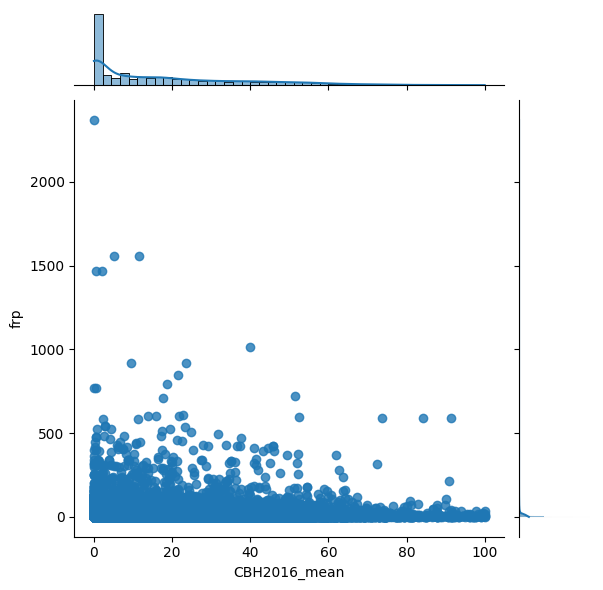

In [ ]:
sns.jointplot(x='CBH2016_mean', y='frp', data=df, kind="reg");

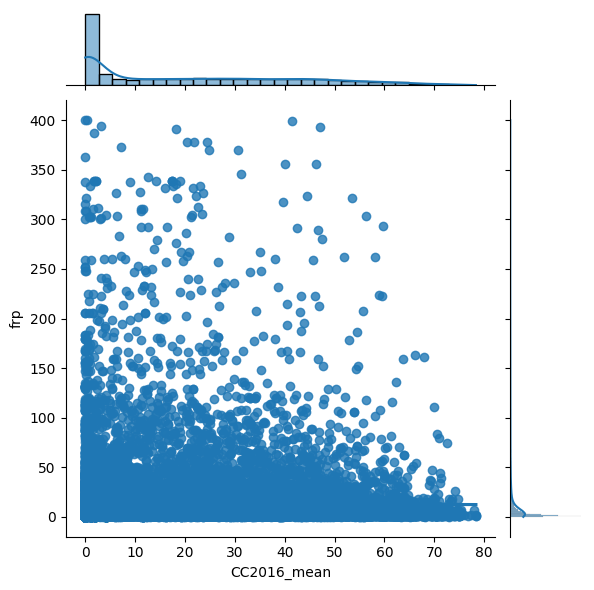

In [ ]:
sns.jointplot(x='CC2016_mean', y='frp', data=df, kind="reg");

In [ ]:
#elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# load as an array
X = df[['frp', 'CBD2016_mean', 'CBH2016_mean', 'CC2016_mean', 'CH2016_mean', 'EVC2016_mean', 'EVH2016_mean', 'EVT2016_mean', 'SLP2016_mean', 'ELEV2016_mean']]

# try a range of K values
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS 
plt.plot(range(2, 11), wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# fill x with correlated data
X = df[['frp', 'CBD2016_mean', 'CBH2016_mean', 'CC2016_mean']]

# Standardize 
X = (X - X.mean()) / X.std()

# do k means
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Get cluster assignments
labels = kmeans.labels_

# add cluster assignments
df['cluster'] = labels


In [ ]:
import matplotlib.pyplot as plt

# need diff colors for each cluster
colors = {0: 'red', 1: 'green', 2: 'blue'}

# make scatterplot for visuals
fig, ax = plt.subplots()
for label, color in colors.items():
    mask = labels == label
    ax.scatter(X[mask]['frp'], X[mask]['CBD2016_mean'], color=color, label=label)

# make graph understandable
ax.set_xlabel('FRP')
ax.set_ylabel('CBD2016_mean')
ax.legend()

plt.show()
